In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2024-09-02 00:33:07.412679: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 00:33:07.478674: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 00:33:08.143716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 00:33:08.146586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 00:33:10.380800: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
import pandas as pd

# Caminho para o arquivo CSV
csv_file_path = 'filtered_filled_ndvi_sample_interpolado_v3.csv'  # Substitua com o caminho do seu arquivo CSV

# Ler o arquivo CSV
df = pd.read_csv(csv_file_path)

# Verificar as primeiras linhas do DataFrame para garantir que foi lido corretamente
print("Primeiras linhas do DataFrame:")
print(df.head())

# Definir os valores mínimo e máximo para normalização
min_pixel_value = df.iloc[:, 2:].min().min()  # Valor mínimo em todas as colunas de pixel
max_pixel_value = df.iloc[:, 2:].max().max()  # Valor máximo em todas as colunas de pixel

# Identificar as colunas de pixel (a partir da terceira coluna)
pixel_columns = df.columns[2:]

# Normalizar os valores de pixel para o intervalo de 0 a 1
df[pixel_columns] = df[pixel_columns].apply(lambda x: (x - min_pixel_value) / (max_pixel_value - min_pixel_value))

# Verificar o DataFrame resultante
print("DataFrame após normalização:")
print(df.head())

# Salvar o DataFrame normalizado em um novo arquivo CSV (opcional)
df.to_csv('seu_arquivo_normalizado.csv', index=False)


Primeiras linhas do DataFrame:
   0  1  5070  5070.1  5143  5216  5289  6636  6273  6317  ...  7500  7785  \
0  1  1  7263    7263  5778  4294  7061  7001  6830  6853  ...  7369  7544   
1  2  1  5436    5436  5810  6184  6558  6343  6008  6061  ...  6162  6529   
2  3  1  6139    6139  6531  6923  6854  6619  6350  6335  ...  6982  7323   
3  4  1  6927    6927  6912  6897  6882  6694  6233  6610  ...  6198  7707   
4  5  1  5152    5152  5691  6231  6771  7019  6879  6725  ...  7312  7520   

   7665  7568  7149  6731  7592  7429  7267  6926  
0  7405  7284  6628  5972  7385  7309  7233  7014  
1  6611  6757  6542  6328  6816  7051  6548  6078  
2  7448  7407  7104  6802  6856  7015  7175  6749  
3  7683  7458  7140  6823  7546  7310  7149  6679  
4  7440  7391  7437  7483  7529  7235  7225  7038  

[5 rows x 35 columns]
DataFrame após normalização:
   0  1      5070    5070.1      5143      5216      5289      6636      6273  \
0  1  1  0.905195  0.905195  0.826235  0.747328  0.8944

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caminho para o arquivo CSV
csv_file_path = 'seu_arquivo_normalizado.csv'  # Substitua com o caminho do seu arquivo CSV

# Ler o arquivo CSV sem cabeçalhos
df = pd.read_csv(csv_file_path, header=None)

# Nomear as colunas
df.columns = ['fid', 'tipo'] + [f'pixel_{i}' for i in range(1, df.shape[1] - 2 + 1)]

# Verificar as primeiras linhas do DataFrame para garantir que foi lido corretamente
print("Primeiras linhas do DataFrame:")
print(df.head())

# Normalizar os valores de pixel para o intervalo de 0 a 1
min_pixel_value = df.iloc[:, 2:].min().min()  # Valor mínimo em todas as colunas de pixel
max_pixel_value = df.iloc[:, 2:].max().max()  # Valor máximo em todas as colunas de pixel

# Identificar as colunas de pixel (a partir da terceira coluna)
pixel_columns = df.columns[2:]

# Normalizar as colunas de pixel
df[pixel_columns] = df[pixel_columns].apply(lambda x: (x - min_pixel_value) / (max_pixel_value - min_pixel_value))

# Dividir os dados em características (X) e rótulos (y)
X = df[pixel_columns]
y = df[['fid', 'tipo']]  # Ajuste conforme necessário, se `tipo` for rótulo

# Dividir em treinamento e teste (80% treinamento, 20% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de teste em validação e teste (50% validação, 50% teste do conjunto restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar as dimensões dos conjuntos
print("Dimensões dos conjuntos:")
print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

# Opcional: salvar os conjuntos em arquivos CSV
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Primeiras linhas do DataFrame:
   fid  tipo      pixel_1      pixel_2      pixel_3      pixel_4      pixel_5  \
0    0     1  5070.000000  5070.100000  5143.000000  5216.000000  5289.000000   
1    1     1     0.905195     0.905195     0.826235     0.747328     0.894454   
2    2     1     0.808050     0.808050     0.827936     0.847823     0.867709   
3    3     1     0.845430     0.845430     0.866273     0.887116     0.883448   
4    4     1     0.887329     0.887329     0.886532     0.885734     0.884936   

       pixel_6      pixel_7      pixel_8  ...     pixel_24     pixel_25  \
0  6636.000000  6273.000000  6317.000000  ...  7500.000000  7785.000000   
1     0.891264     0.882172     0.883394  ...     0.910831     0.920136   
2     0.856277     0.838464     0.841283  ...     0.846653     0.866167   
3     0.870952     0.856649     0.855852  ...     0.890254     0.908385   
4     0.874940     0.850428     0.870474  ...     0.848567     0.928803   

      pixel_26     pixel_27    

In [9]:
y['tipo'].unique()

array([1, 0])

Número total de pixels por imagem: 33
Possíveis dimensões da imagem (largura, altura): [(1, 33), (3, 11)]
Largura: 1, Altura: 33


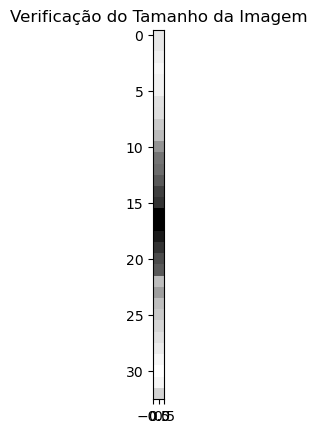

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assumindo que X_train é um DataFrame ou matriz com imagens como linhas
X_train_array = X_train.to_numpy()

# Verificar o número total de pixels por imagem
num_pixels = X_train_array.shape[1]
print(f"Número total de pixels por imagem: {num_pixels}")

# Encontrar possíveis dimensões para a imagem
def find_dimensions(num_pixels):
    dimensions = []
    for width in range(1, int(np.sqrt(num_pixels)) + 1):
        if num_pixels % width == 0:
            height = num_pixels // width
            dimensions.append((width, height))
    return dimensions

possible_dimensions = find_dimensions(num_pixels)
print("Possíveis dimensões da imagem (largura, altura):", possible_dimensions)

# Escolher uma dimensão para visualização, ou use a dimensão esperada
if possible_dimensions:
    image_width, image_height = possible_dimensions[0]  # Escolha a dimensão desejada
else:
    raise ValueError("Nenhuma dimensão válida encontrada para o número de pixels.")

print(f"Largura: {image_width}, Altura: {image_height}")

# Exibir a primeira imagem para verificar o formato
first_image = X_train_array[0].reshape(image_height, image_width)
plt.imshow(first_image, cmap='gray')
plt.title('Verificação do Tamanho da Imagem')
plt.show()


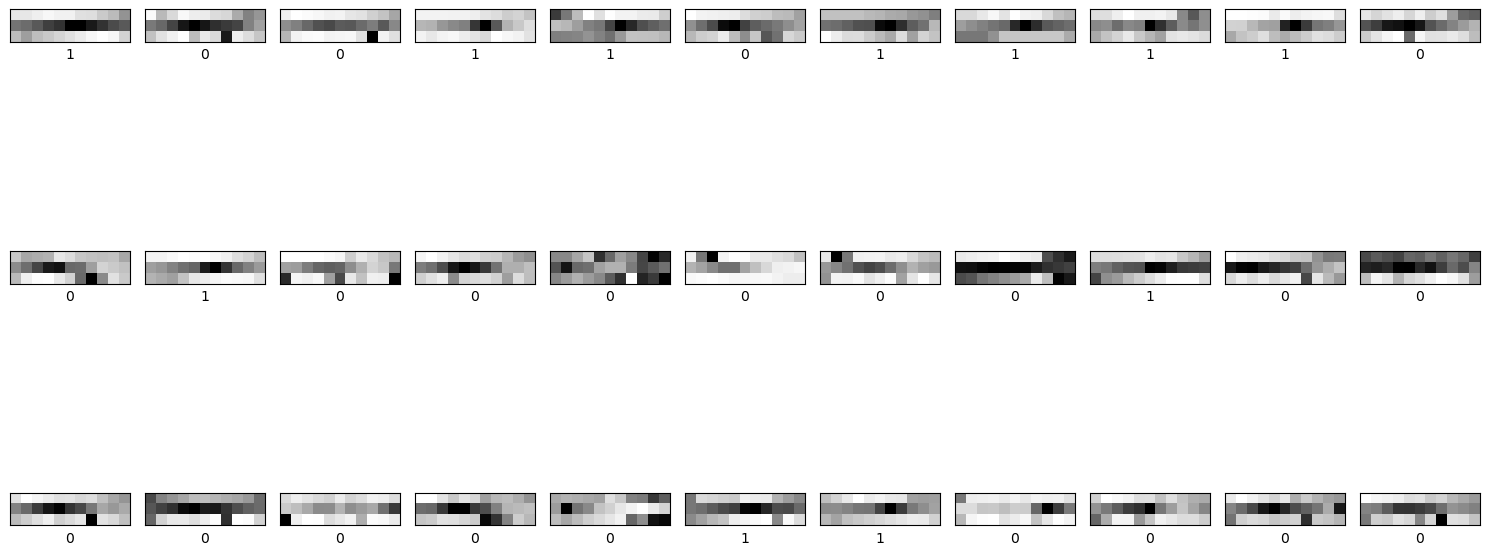

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Assumindo que X_train é um DataFrame ou matriz com imagens como linhas
X_train_array = X_train.to_numpy()

# Definir as dimensões da imagem
image_width = 11  # Ajuste conforme suas dimensões
image_height = 3  # Ajuste conforme suas dimensões

# Verifique se a altura calculada é válida
if X_train_array.shape[1] != image_width * image_height:
    raise ValueError("O número total de pixels não corresponde às dimensões especificadas.")

# Configurar a figura para exibir as imagens
plt.figure(figsize=(15, 9))  # Ajuste o tamanho da figura conforme necessário

# Plotar 33 imagens em uma grade de 3 linhas e 11 colunas
for i in range(33):  # 33 imagens
    plt.subplot(3, 11, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # Redefinir as dimensões da imagem
    img = X_train_array[i].reshape(image_height, image_width)
    plt.imshow(img, cmap='gray')  # Use 'gray' se as imagens são em escala de cinza
    
    # Exibir o nome da classe
    plt.xlabel(class_names[int(y_train.iloc[i]['tipo'])])  # Ajuste 'tipo' conforme necessário

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [30]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caminho para o arquivo CSV
csv_file_path = 'seu_arquivo_normalizado.csv'  # Substitua com o caminho do seu arquivo CSV

# Ler o arquivo CSV sem cabeçalhos
df = pd.read_csv(csv_file_path, header=None)

# Nomear as colunas
df.columns = ['fid', 'tipo'] + [f'pixel_{i}' for i in range(1, df.shape[1] - 1)]

# Normalizar os valores de pixel para o intervalo de 0 a 1
min_pixel_value = df.iloc[:, 2:].min().min()
max_pixel_value = df.iloc[:, 2:].max().max()

pixel_columns = df.columns[2:]
df[pixel_columns] = df[pixel_columns].apply(lambda x: (x - min_pixel_value) / (max_pixel_value - min_pixel_value))

# Dividir os dados em características (X) e rótulos (y)
X = df[pixel_columns].values  # Convert to NumPy array
y = df['tipo'].values         # Convert to NumPy array

# Dividir em treinamento e teste (80% treinamento, 20% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir o conjunto de teste em validação e teste (50% validação, 50% teste do conjunto restante)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar as dimensões dos conjuntos
print("Dimensões dos conjuntos:")
print(f"Treinamento: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}")

# Opcional: salvar os conjuntos em arquivos CSV
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(X_val).to_csv('X_val.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_val).to_csv('y_val.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)


Dimensões dos conjuntos:
Treinamento: (536, 33), Validação: (67, 33), Teste: (67, 33)


In [56]:
from tensorflow.keras import layers, models
import tensorflow as tf

# Definir o modelo
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(33,)))  # Ajuste o tamanho de entrada para 33 pixels
model.add(layers.Dense(12, activation='tanh'))
model.add(layers.Dense(1, activation='tanh'))
model.add(layers.Dense(100))  # Ajuste o número de classes conforme necessário

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 12)                408       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
 dense_24 (Dense)            (None, 100)               200       
                                                                 
Total params: 621 (2.43 KB)
Trainable params: 621 (2.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))


Epoch 1/20
17/17 [==============================] - 0s 7ms/step - loss: 4.5821 - accuracy: 0.4869 - val_loss: 4.5549 - val_accuracy: 0.4030
Epoch 2/20
17/17 [==============================] - 0s 2ms/step - loss: 4.5275 - accuracy: 0.5168 - val_loss: 4.4960 - val_accuracy: 0.4030
Epoch 3/20
17/17 [==============================] - 0s 2ms/step - loss: 4.4624 - accuracy: 0.5168 - val_loss: 4.4250 - val_accuracy: 0.4030
Epoch 4/20
17/17 [==============================] - 0s 2ms/step - loss: 4.3841 - accuracy: 0.5168 - val_loss: 4.3401 - val_accuracy: 0.4030
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 4.2920 - accuracy: 0.5168 - val_loss: 4.2422 - val_accuracy: 0.4030
Epoch 6/20
17/17 [==============================] - 0s 2ms/step - loss: 4.1885 - accuracy: 0.5168 - val_loss: 4.1351 - val_accuracy: 0.4030
Epoch 7/20
17/17 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.5168 - val_loss: 4.0244 - val_accuracy: 0.4030
Epoch 8/20
17/17 [==

In [58]:
# Avaliar o modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


3/3 - 0s - loss: 2.9297 - accuracy: 0.4627 - 16ms/epoch - 5ms/step
Test accuracy: 0.46268656849861145


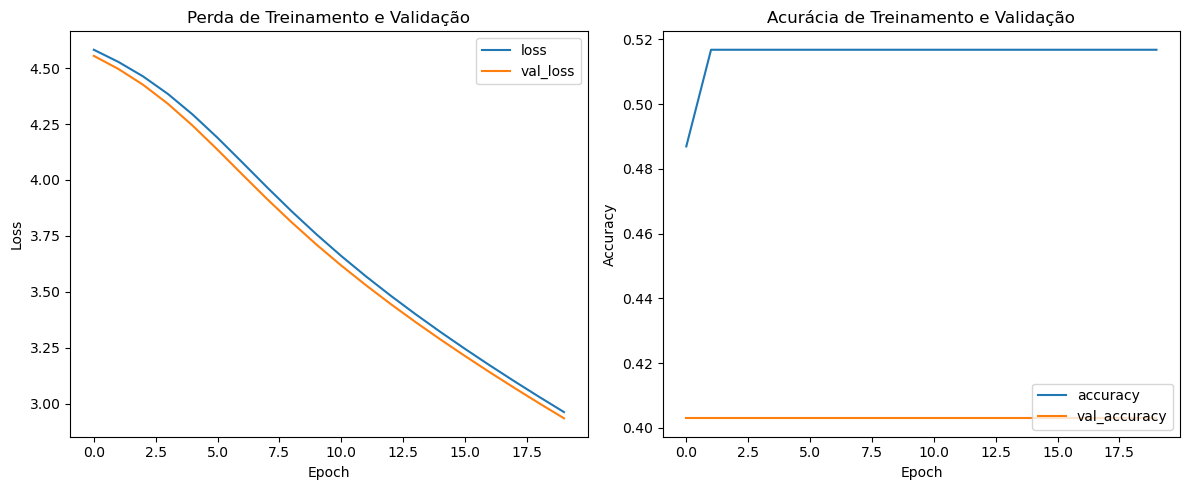

In [59]:
import matplotlib.pyplot as plt

# Plotar a perda de treinamento e validação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Perda de Treinamento e Validação')

# Plotar a acurácia de treinamento e validação
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Acurácia de Treinamento e Validação')

plt.tight_layout()
plt.show()
